In [2]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from salishsea_tools import geo_tools

%matplotlib inline

In [3]:
bathyfile = '/home/sallen/MEOPAR/grid/bathymetry_201702.nc'
meshfile = '/home/sallen/MEOPAR/grid/mesh_mask201702.nc'
mesh = nc.Dataset(meshfile)
model_lats = nc.Dataset(bathyfile).variables['nav_lat'][:]
model_lons = nc.Dataset(bathyfile).variables['nav_lon'][:]
t_mask = mesh.variables['tmask'][0, 0]

In [4]:
windfile = './ubcSSaAtmosphereGridV1_0f03_6268_df4b.nc'
wind_lats = nc.Dataset(windfile).variables['latitude'][:]
wind_lons = nc.Dataset(windfile).variables['longitude'][:] -360

In [5]:
wavefile = '/results/SalishSea/wwatch3-forecast/SoG_ww3_fields_20170515_20170517.nc'
wave_lats = nc.Dataset(wavefile).variables['latitude'][:]
wave_lons = nc.Dataset(wavefile).variables['longitude'][:] -360.
wave_lons, wave_lats = np.meshgrid(wave_lons, wave_lats)
hs = nc.Dataset(wavefile).variables['hs'][0]
wave_mask = np.where(hs !=0, 1, 0)

In [6]:
def get_tidal_stations(lon, lat, model_lons, model_lats, wind_lons, wind_lats, 
                       wave_lons, wave_lats, t_mask, wave_mask, size=20):
    y, x = geo_tools.find_closest_model_point(lon, lat, model_lons, model_lats, grid='NEMO', land_mask=1-t_mask)
    ywind, xwind = geo_tools.find_closest_model_point(lon, lat, wind_lons, wind_lats, grid='GEM2.5')
    ywave, xwave = geo_tools.find_closest_model_point(lon, lat, wave_lons, wave_lats, grid='NEMO', land_mask=1-wave_mask)

    fig, ax = plt.subplots(1, 1, figsize=(7, 7))
    bigx = min(x+size, model_lons.shape[1]-1)
    imin, imax = model_lats[y-size, x-size], model_lats[y+size, bigx]
    jmin, jmax = model_lons[y+size, x-size], model_lons[y-size, bigx]
    dlon = model_lons[y+1, x+1] - model_lons[y, x]
    dlat = model_lats[y+1, x+1] - model_lats[y, x]
    ax.pcolormesh(model_lons - dlon/2., model_lats-dlat/2., t_mask, cmap='Greys_r')
    ax.set_xlim(jmin, jmax)
    ax.set_ylim(imin, imax)
    ax.plot(model_lons[y, x], model_lats[y, x], 'ro', label='NEMO')
    ax.plot(wind_lons[ywind, xwind], wind_lats[ywind, xwind], 'ys', label='GEM2.5')
    ax.plot(wave_lons[ywave, xwave], wave_lats[ywave, xwave], 'bo', label='WW3')
    ax.legend()
    return "NEMO y, x: {0}, Wind y, x: {1}, Wave y, x: {2}".format([y, x], [ywind, xwind], [ywave, xwave])

### Patricia Bay

7277	Patricia Bay	48.6536 	123.4515 

'NEMO y, x: [351, 214], Wind y, x: [115, 143], Wave y, x: [145, 363]'

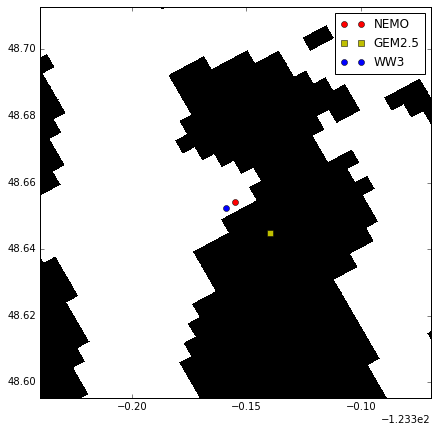

In [7]:
get_tidal_stations(-123.4515, 48.6536, model_lons, model_lats, wind_lons, wind_lats, 
                   wave_lons, wave_lats, t_mask, wave_mask, size=10)

### Woodwards
7610	Woodwards's Landing	49.1251 	123.0754 

'NEMO y, x: [414, 329], Wind y, x: [135, 158], Wave y, x: [246, 401]'

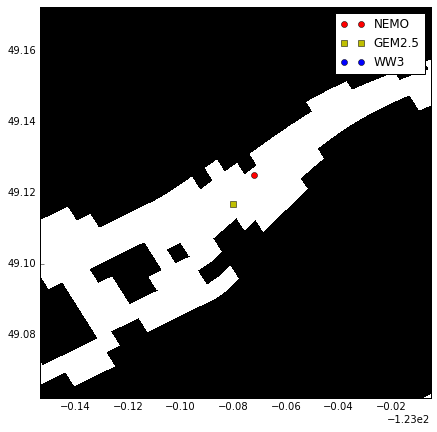

In [8]:
get_tidal_stations(-123.0754, 49.1251, model_lons, model_lats, wind_lons, wind_lats, 
                   wave_lons, wave_lats, t_mask, wave_mask, size=10)

### New Westminster
7654	New Westminster	49.203683 	122.90535 

'NEMO y, x: [423, 363], Wind y, x: [138, 164], Wave y, x: [234, 442]'

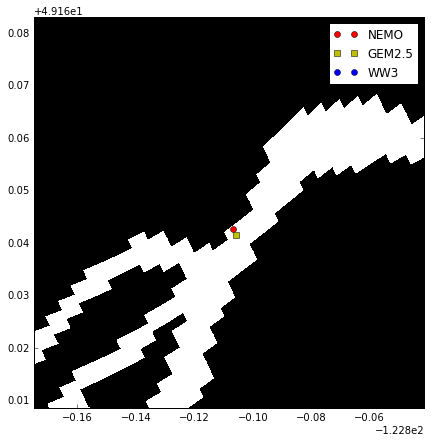

In [9]:
get_tidal_stations(-122.90535, 49.203683, model_lons, model_lats, wind_lons, wind_lats, 
                   wave_lons, wave_lats, t_mask, wave_mask, size=10)

### Sandy Cove
7786	Sandy Cove	49.34 	123.23 

'NEMO y, x: [468, 333], Wind y, x: [146, 155], Wave y, x: [294, 396]'

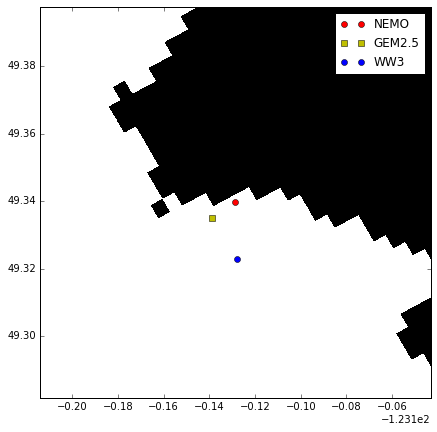

In [10]:
get_tidal_stations(-123.23, 49.34, model_lons, model_lats, wind_lons, wind_lats, 
                   wave_lons, wave_lats, t_mask, wave_mask, size=10)

### Port Renfrew 
check
8525	Port Renfrew	48.555	124.421

'NEMO y, x: [401, 61], Wind y, x: [117, 112], Wave y, x: [123, 226]'

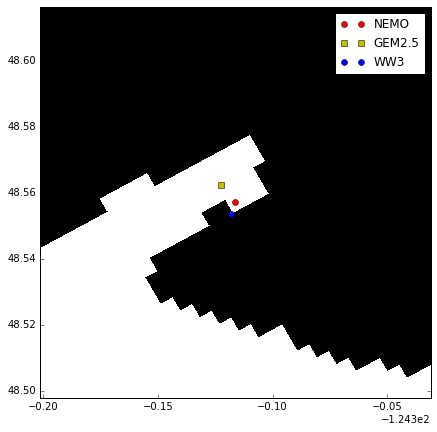

In [11]:
get_tidal_stations(-124.421, 48.555, model_lons, model_lats, wind_lons, wind_lats, 
                   wave_lons, wave_lats, t_mask, wave_mask, size=10)

### Victoria
7120	Victoria	48.424666 	123.3707 

'NEMO y, x: [302, 196], Wind y, x: [104, 143], Wave y, x: [90, 374]'

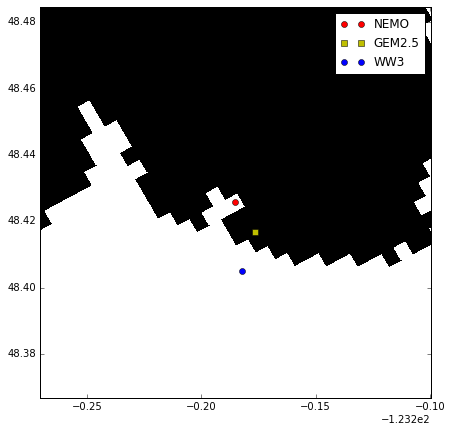

In [12]:
get_tidal_stations(-123.3707, 48.424666, model_lons, model_lats, wind_lons, wind_lats, 
                   wave_lons, wave_lats, t_mask, wave_mask, size=10)

### Sand Heads
7594	Sand Heads	49.125	123.195   
From Marlene's email  
49º 06’ 21.1857’’, -123º 18’ 12.4789’’
we are using 426, 292  
end of jetty is 429, 295  

-123.3034663611111 49.10588491666667


'NEMO y, x: [428, 293], Wind y, x: [136, 151], Wave y, x: [246, 385]'

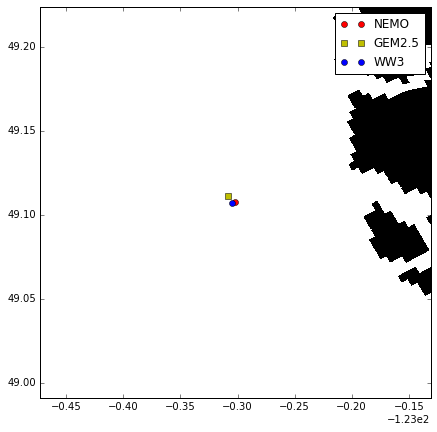

In [13]:
lat_sh = 49+6/60.+21.1857/3600.
lon_sh = -(123+18/60.+12.4789/3600.)
print(lon_sh, lat_sh)
get_tidal_stations(lon_sh, lat_sh, model_lons, model_lats, wind_lons, wind_lats, 
                   wave_lons, wave_lats, t_mask, wave_mask, size=20)

### Nanaimo
7917	Nanaimo	49.17 	123.93 

'NEMO y, x: [485, 209], Wind y, x: [142, 133], Wave y, x: [261, 298]'

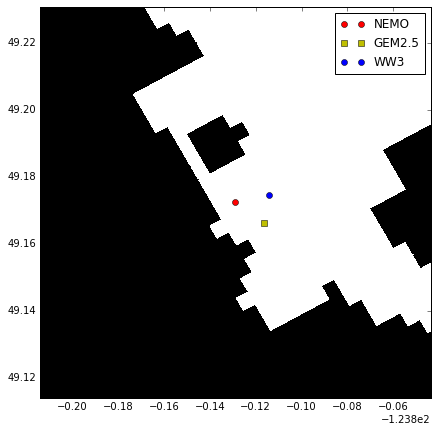

In [14]:
get_tidal_stations(-123.93, 49.17, model_lons, model_lats, wind_lons, wind_lats, 
                   wave_lons, wave_lats, t_mask, wave_mask, size=10)

In our code its at 484, 208 with lon,lat at -123.93 and 49.16: leave as is for now

### Boundary Bay

Guesstimated from Map
-122.925 49.0

'NEMO y, x: [380, 335], Wind y, x: [129, 162], Wave y, x: [222, 439]'

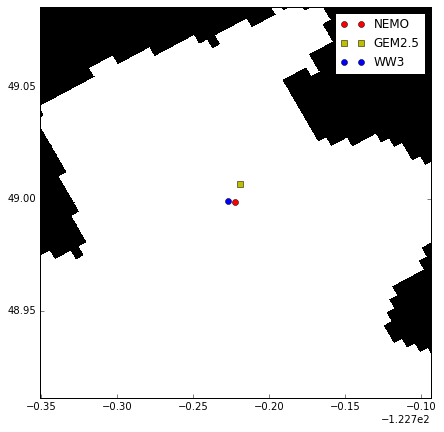

In [15]:
get_tidal_stations(-122.925, 49.0, model_lons, model_lats, wind_lons, wind_lats, 
                   wave_lons, wave_lats, t_mask, wave_mask, size=15)


### Squamish
49 41.675 N 123 09.299 W

49.694583333333334 -123.15498333333333
(898, 398)


'NEMO y, x: [532, 389], Wind y, x: [162, 160], Wave y, x: [370, 404]'

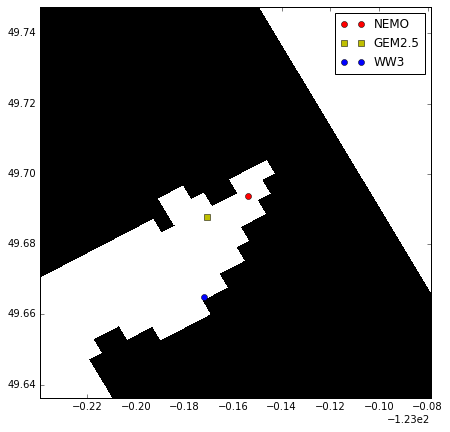

In [16]:
print (49+41.675/60, -(123+9.299/60.))
print (model_lons.shape)
get_tidal_stations(-(123+9.299/60.), 49.+41.675/60., model_lons, model_lats, wind_lons, wind_lats, 
                   wave_lons, wave_lats, t_mask, wave_mask, size=10)


### Half Moon Bay
49 30.687 N 123 54.726 W

49.51145 -123.9121


'NEMO y, x: [549, 254], Wind y, x: [158, 136], Wave y, x: [331, 297]'

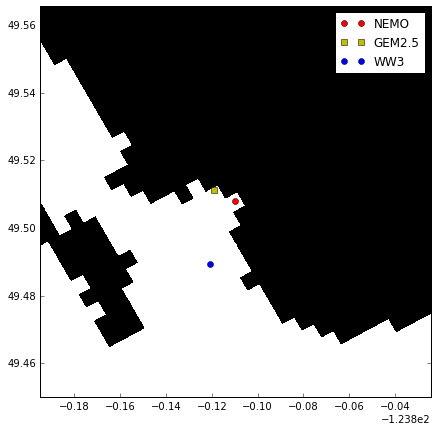

In [17]:
print (49+30.687/60, -(123+54.726/60.))
get_tidal_stations(-(123+54.726/60.), 49.+30.687/60., model_lons, model_lats,  wind_lons, wind_lats, 
                   wave_lons, wave_lats, t_mask, wave_mask, size=10)


### Friday Harbour
-123.016667, 48.55

'NEMO y, x: [300, 267], Wind y, x: [108, 155], Wave y, x: [124, 427]'

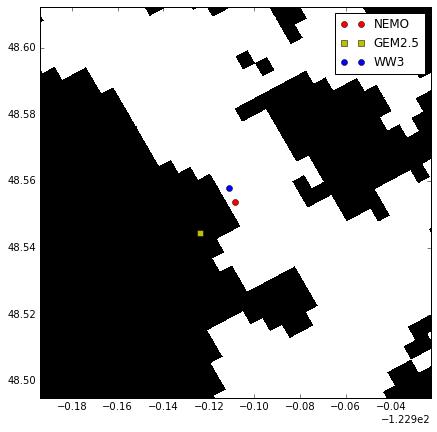

In [18]:
get_tidal_stations(-123.016667, 48.55, model_lons, model_lats,  wind_lons, wind_lats, 
                   wave_lons, wave_lats, t_mask, wave_mask, size=10)


### Neah Bay
-124.6, 48.4

'NEMO y, x: [384, 15], Wind y, x: [111, 105], Wave y, x: [89, 200]'

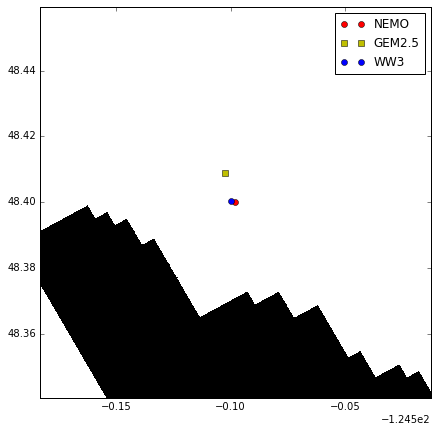

In [19]:
get_tidal_stations(-124.6, 48.4, model_lons, model_lats,  wind_lons, wind_lats, 
                   wave_lons, wave_lats, t_mask, wave_mask, size=10)

In [20]:
from salishsea_tools import places